In [30]:
import pandas as pd

LABELED_PATH = "../data/processed/wintermute_transfers_clean_defi.parquet"  # adjust if you used .csv
df_defi = pd.read_parquet(LABELED_PATH)
display(df_defi.shape)
display(df_defi.info())

(365942, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365942 entries, 0 to 365941
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   timestamp     365942 non-null  object 
 1   from_address  365942 non-null  object 
 2   from_entity   365942 non-null  object 
 3   to_address    365942 non-null  object 
 4   to_entity     365942 non-null  object 
 5   token         365942 non-null  object 
 6   value         365942 non-null  float64
 7   usd           365942 non-null  float64
 8   tx_hash       365942 non-null  object 
 9   chain         365942 non-null  object 
 10  block_number  365942 non-null  float64
dtypes: float64(3), object(8)
memory usage: 30.7+ MB


None

# Frquency Top 10

,token,tx_count
0,USDC,108598
1,WSOL,96220
2,SOL,47722
3,WETH,39394
4,USDT,16765
5,WBTC,12532
6,cbBTC,8854
7,ARB,5166
8,WBNB,2765
9,JUP,2442


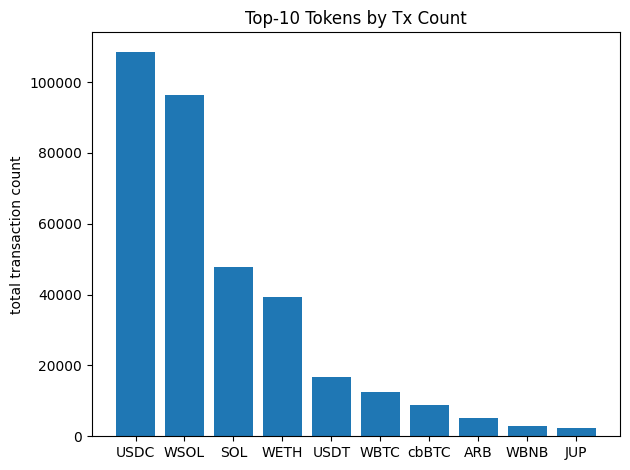

In [31]:
import matplotlib.pyplot as plt

top_freq = (
    df_defi["token"]
    .value_counts()
    .head(10)
    .rename_axis("token")
    .reset_index(name="tx_count")
)
display(top_freq)

plt.bar(top_freq['token'],top_freq['tx_count'])
plt.ylabel("total transaction count")
plt.title("Top-10 Tokens by Tx Count")
plt.tight_layout()

# Volume top-10

In [32]:
top_vol = (
    df_defi.groupby("token")['value'].apply(pd.DataFrame).abs().sum()
    .sort_values(ascending=False)
    .head(10)
    .rename_axis("token")
    .reset_index(name="raw_volume")
)
display(top_vol)

,token,raw_volume
0,BabyDoge,8.302886e+13
1,Mog,1.432663e+12
2,PEPE,3.311216e+11
3,Bonk,6.427996e+10
4,SHIB,3.800477e+10
5,CAT,2.325998e+10
6,WEN,1.668027e+09
7,APU,6.410840e+08
8,Neiro,4.533176e+08
9,USDC,2.993266e+08


,token,raw_volume_usd
0,USDC,2.993269e+08
1,WETH,2.477306e+08
2,USDT,9.378965e+07
3,WSOL,9.209269e+07
4,WBTC,6.397097e+07
5,cbBTC,5.757610e+07
6,ETH,5.552241e+07
7,SOL,2.357058e+07
8,WBNB,1.004289e+07
9,BTCB,7.235141e+06


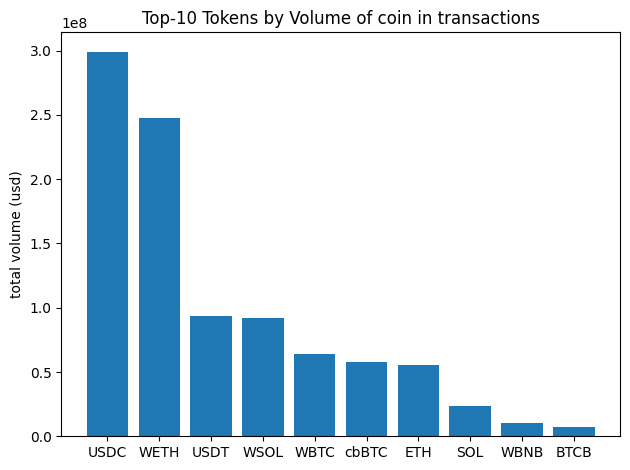

In [33]:
top_vol_usd = (
    df_defi.groupby("token")['usd'].apply(pd.DataFrame).abs().sum()
    .sort_values(ascending=False)
    .head(10)
    .rename_axis("token")
    .reset_index(name="raw_volume_usd")
)
display(top_vol_usd)

plt.bar(top_vol_usd['token'],top_vol_usd['raw_volume_usd'])
plt.ylabel("total volume (usd)")
plt.title("Top-10 Tokens by Volume of coin in transactions")
plt.tight_layout()

# Chain Top-10

,chain,chain_count
0,solana,250403
1,arbitrum_one,65447
2,base,20845
3,ethereum,18575
4,bsc,7346
5,optimism,3325
6,avalanche,1


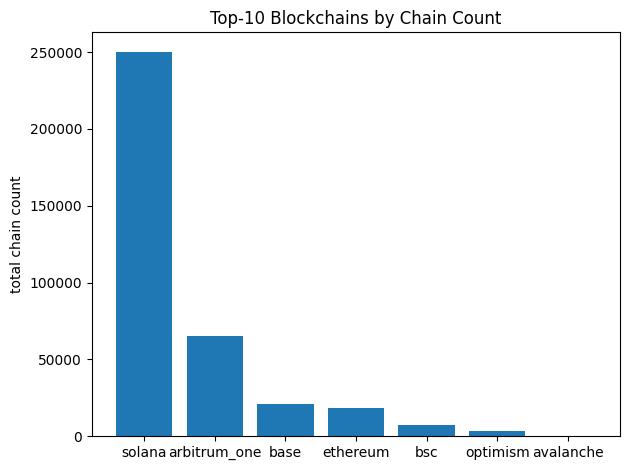

In [34]:
top_chain = (
    df_defi["chain"]
    .value_counts()
    .head(10)
    .rename_axis("chain")
    .reset_index(name="chain_count")
)
display(top_chain)

plt.bar(top_chain['chain'],top_chain['chain_count'])
plt.ylabel("total chain count")
plt.title("Top-10 Blockchains by Chain Count")
plt.tight_layout()

# Entity Top-10

In [35]:
df_defi_from = df_defi[df_defi['from_entity']!='Wintermute']
df_defi_from = df_defi_from.rename(columns={"from_address": "address", "from_entity": "entity"})

df_defi_to = df_defi[df_defi['to_entity']!='Wintermute']
df_defi_to = df_defi_to.rename(columns={"to_address": "address", "to_entity": "entity"})

df_defi_non_wintermute = (
    pd.concat([df_defi_from, df_defi_to], ignore_index=True)
    .drop(columns=['from_address','from_entity',
                'to_address','to_entity'])
    .reset_index(drop=True)
    .sort_values('entity')
)

Text(0.5, 1.0, 'Top 10 DeFi Entities by Total USD')

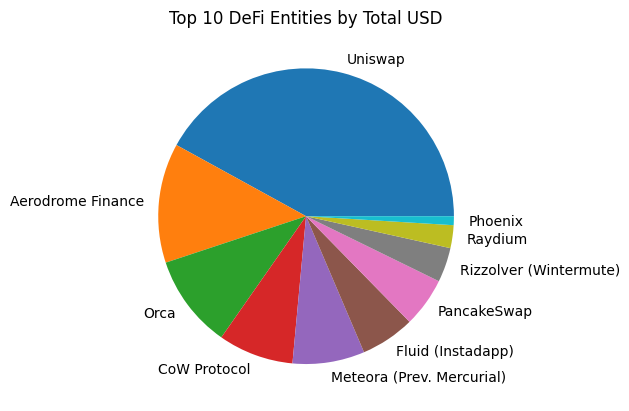

In [36]:
top_entity = (
    df_defi_non_wintermute
    .groupby(by='entity',)
    .agg(total_usd=('usd','sum'))
    .sort_values(by='total_usd',ascending=False)
)
top_entity[:10].plot.pie(y='total_usd',legend=False,label="")
plt.title('Top 10 DeFi Entities by Total USD')